test 추가

In [1]:
from selenium import webdriver
import requests
from bs4 import BeautifulSoup as bs
import time

In [120]:
# 크롤링 결과 담을 리스트

# 크롤링 함수
def crawl(start, end):
    for p in range(start,end):
        html = driver.page_source
        soup = bs(html, 'html.parser')
        reviews = soup.select('#review > ul > li')
        
        for r in reviews:
            review.append(r.select_one('.txt').text)
            star.append(r.select_one('.score_wrap_sm .num').text)
        
        try:
            driver.find_element_by_xpath('//*[@id="pagination"]/div/button['+str(p)+']').click()
            time.sleep(1)
        except:
            break
            
        time.sleep(1)
        print(soup.select('.paging .on')[0].text)
        

def make_review_crawl(url):

    driver.get(url)

    # 페이지 파싱
    html = driver.page_source
    soup = bs(html, 'html.parser')

    # '리뷰' 클릭하도록 명령
    driver.find_element_by_xpath('//*[@id="content"]/div[2]/button[3]').click()
    
    # 리뷰 총 개수
    top_total = int(soup.select('.score_top')[0].find('p').find('b').text)

    # 마지막 페이지 수 (한페이지에 리뷰 10개씩)
    last_page = top_total // 10 + 1 

    # next_page 몇 번 클릭 해야하는지 설정
    if last_page % 5 == 0:
        page_step = last_page // 5 
    else:
        page_step = last_page // 5 + 1   
    
    #print(top_total, last_page, page_step)
    
    step = 1
    while(page_step >= step):
        # 마지막 step
        if (step == page_step) and (step != 1):
            #print('step 마지막 loop')
            if top_total % 50 > 10:
                            
                if last_page % 5 == 0:
                    end_page = 8
                else: 
                    end_page =last_page % 5 + 3
                
                crawl(3, end_page)

            # 마지막 페이지
            crawl_final()
        
        
        # 첫번째 step
        elif step == 1 :
            print('step1 loop')
            crawl(2,7)    
        
        # 중간 step
        else:
            #print('step 중간 loop')
            crawl(3,8)
        step += 1

4

    top_text = soup.select('.score_top')[0].find('strong').text
    top_score = soup.select('.score_top .num')[0].text
    top_total=soup.select('.score_top')[0].find('p').find('b').text

## 리뷰 집계 데이터

In [3]:
import pandas as pd

In [121]:
review = []
star = []

driver = webdriver.Chrome('./chromedriver')

# 페이지 로딩 3초 대기
driver.implicitly_wait(3)
make_review_crawl('https://www.goodchoice.kr/product/detail?ano=6525') #페이토강남

driver.close()

step1 loop
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21


In [122]:
페이토강남 = pd.DataFrame({
    'review': review,
    'star': star
})
페이토강남

,review,star
0,깨끗하고 조용해서좋아요,10.0
1,시설 엄청좋아요 ~,10.0
2,호텔 페이토 강남 조식 할인 낚시 가을 패키지 후기. 카페 포즈 추가요금 요구 대응...,5.6
3,잘쉬고 갑니다!담에 또올께요,9.3
4,직원분들 친절하시고 룸은 깨끗하고 좋아요!,10.0
...,...,...
215,깔끔하고 좋았어요~~~,8.8
216,깔끔하고 좋았어요^^sl,8.8
217,"방업그래이드해주셨내요. 편안하게 자고왔습니다. 3시부터 체크인, 복도소음은 조금 아...",7.8
218,깨끗해요하지만 바닥난방이 안되는 양실난방이라겨울엔 히터건조함 감수해야죠좁지만 아기자...,8.8


In [57]:
review = []
star = []

driver = webdriver.Chrome('./chromedriver')

# 페이지 로딩 3초 대기
driver.implicitly_wait(3)
make_review_crawl('https://www.goodchoice.kr/product/detail?ano=6258') #임피리얼 팰리스

driver.close()

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25


In [58]:
임피리얼팰리스 = pd.DataFrame({
    'review': review,
    'star': star
})
임피리얼팰리스

,review,star
0,아주 좋았어요조식 나쁘지 않았고룸컨디션은 말할 필요도 없이♡침구 너무 좋았구요다만 ...,8.6
1,전체적으로 고급지고 앤틱한 느낌이 강한 호텔이었어요!트윈 숙박비가 다른곳에 비해 저...,10.0
2,약간 신선한 느낌이였습니다 오래된 느낌에 잘이용했어용,8.3
3,그냥 소소하고 주중에는 라운지 운영 안하나봐요 ㅠㅠ,8.0
4,편안하고. 친절하고 . 발렛이 안되는 아쉬움은 있지만 편히 잘쉬었습니다.,10.0
...,...,...
249,너무잘 이용해서 정말 좋았다는 말뿐이 안나오네요,8.4
250,편하게 잘있다고 돌아갑니다,9.2
251,조용하고 청결하여 최고였습니다,9.2
252,객실청결상태나 구성은 매우 만족.편리를위해 발렛 서비스를 하였으나 삼십분 이상 기다...,8.5


In [59]:
url = 'https://www.goodchoice.kr/product/detail?ano=7936'#신라스테이_역삼 

review = []
star = []

driver = webdriver.Chrome('./chromedriver')

# 페이지 로딩 3초 대기
driver.implicitly_wait(3)
make_review_crawl(url) 

driver.close()

신라스테이_역삼 = pd.DataFrame({
    'review': review,
    'star': star
})
신라스테이_역삼

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45


,review,star
0,14층 통유리라 야경 이뻐요.가격도 . 이벤트 할인 적용.1인조식 .강남이나 다른데...,10.0
1,잘 쉬었다가 갑니다,9.0
2,가성비 갑 직원분들 너무 친절하세여,9.0
3,욕실에 드라이기 헤드가 고정이 안된 것 빼고는 모두 다 괜찮았어요! 대여서비스가 잘...,6.0
4,편안하게 잘 머물다 갑니다.,10.0
...,...,...
455,서비스도좋고 친절하네요 ~^^. 중국에서. 한국여행중 잡은호텔인뎆 만족합니다,9.0
456,비싸지 않은 가격대에 가장 선호하는 호텔입니다.로비도 고급스럽고 직원분들의 친절함도...,10.0
457,굿굿굿 좋네요 깔끔하고샴푸랑린스가 배치가 안되서 호출뷰른거삐규,10.0
458,27일날 숙박했었구요 객실은 깔끔했구 침대도 푹신해서 너무좋았어요 ㅎㅎㅎ 강남 잠실...,10.0


In [60]:
url = 'https://www.goodchoice.kr/product/detail?ano=7020' #롯데시티호텔 명동
review = []
star = []

driver = webdriver.Chrome('./chromedriver')

# 페이지 로딩 3초 대기
driver.implicitly_wait(3)
make_review_crawl(url) 

driver.close()

롯데시티호텔_명동 = pd.DataFrame({
    'review': review,
    'star': star
})
롯데시티호텔_명동

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51


,review,star
0,"요즘같은 시기에 숨어서 데이트하기 좋았습니다. 위치, 뷰, 친절, 청결, 서비스 모...",10.0
1,좋아요좋아요좋아요좋아요,10.0
2,시설은 좀 오래되었지만 직원의 칠절함과 위치가 좋았습니다또한 숙소에 수질이 너무 좋...,9.6
3,방도 크고 뷰도 좋았습니다 직원분도 친절했어요~잘이용하다갑니다^^,10.0
4,아무래도 바닥이 카페트여서 먼지가 좀 심한거 빼고는 나름 괜찮았어요~ 여친이 비염이...,9.3
...,...,...
511,깔끔하고 좋았습니다,9.2
512,자주가는 곳이지만 갈때마다 새롭고 좋아요,8.8
513,사소한 문제가 있었지만 역시 침구류는 참 편해요,8.8
514,친절한 서비스와 최근에 지어진 깔끔함. 좋았습니다.,10.0


In [86]:
url = 'https://www.goodchoice.kr/product/detail?ano=59067' #시그니엘 서울
review = []
star = []

driver = webdriver.Chrome('./chromedriver')

# 페이지 로딩 3초 대기
driver.implicitly_wait(3)
make_review_crawl(url) 

driver.close()

시그니엘_서울 = pd.DataFrame({
    'review': review,
    'star': star
})
시그니엘_서울

92 10 2
step1 loop
1
2
3
4
5
step 마지막 loop
6
7
8
9


,review,star
0,기념일로 다녀왔는데 너무 좋네요 :) 서울의 가장 높은곳에서 하루 잘 묵고 왔어요 ...,10.0
1,좋아요~~~~~~~,10.0
2,"서비스, 뷰, 룸 컨디션이 손색이 없어 좋았어요.",10.0
3,더 무슨말이 필요할까요?완벽함 그자체였습니다만족을 넘어 감동으로 다가오는 공간이였습니다,10.0
4,"시설은 좋으나 창문이 없어서 환기가 아쉽고 먼지가 아쉽습니다,",10.0
...,...,...
87,친절합니다 첫날밤 샴페인 서비스 받았습니다 평생 남을 기억남게 해주서서 감사합니다,10.0
88,완벽한 호텔. 분위기로 압도합니다.,10.0
89,역시 우리나라 최고층 최고의 호텔답게 서비스 룸청결 객실상태등 단 하나도 빠짐없이 ...,10.0
90,롯데호텔하면 서비스.아시아 최고의 호텔중 하나입니다.뷰는 무조건 한강뷰~(12만원 ...,10.0


## 테이블 합치기

In [87]:
페이토강남['name'] = 'peito'
임피리얼팰리스['name'] = 'impirial'
신라스테이_역삼['name'] = 'sinra'
롯데시티호텔_명동['name'] = 'lotte'
시그니엘_서울['name'] = 'signiel'

In [89]:
df = pd.concat([페이토강남,임피리얼팰리스,신라스테이_역삼,롯데시티호텔_명동,시그니엘_서울])
df

,review,star,name
0,깨끗하고 조용해서좋아요,10.0,peito
1,시설 엄청좋아요 ~,10.0,peito
2,호텔 페이토 강남 조식 할인 낚시 가을 패키지 후기. 카페 포즈 추가요금 요구 대응...,5.6,peito
3,잘쉬고 갑니다!담에 또올께요,9.3,peito
4,직원분들 친절하시고 룸은 깨끗하고 좋아요!,10.0,peito
...,...,...,...
87,친절합니다 첫날밤 샴페인 서비스 받았습니다 평생 남을 기억남게 해주서서 감사합니다,10.0,signiel
88,완벽한 호텔. 분위기로 압도합니다.,10.0,signiel
89,역시 우리나라 최고층 최고의 호텔답게 서비스 룸청결 객실상태등 단 하나도 빠짐없이 ...,10.0,signiel
90,롯데호텔하면 서비스.아시아 최고의 호텔중 하나입니다.뷰는 무조건 한강뷰~(12만원 ...,10.0,signiel


In [99]:
df.to_excel('goodchoice_hotel.xlsx',index=False)

In [116]:
url = 'https://www.goodchoice.kr/product/detail?ano=65311'
review = []
star = []

driver = webdriver.Chrome('./chromedriver')

# 페이지 로딩 3초 대기
driver.implicitly_wait(3)
make_review_crawl(url) 

driver.close()

오크우드 = pd.DataFrame({
    'review': review,
    'star': star
})
오크우드

step1 loop 50 이하
2 3 17
1


,review,star
0,기념일에 이용하기 떡이에요요리하고 쉬고 놀고 아주좋았어요,10.0
1,깔끔하고좋아요~~~,10.0
2,조아여ㅎㅎ자주 이용 할게용,10.0
3,객실이 너무 깨끗하고 냄새도 너무 좋았습니다 그리고 직원분들께서 친절하시고 다음에 ...,10.0
4,레지던스라 파티할때 좋을 것 같아요넓고 깨끗해요침구도 좋네용다만 좀 연식이 느껴지구...,10.0
5,친철한 응대와 룸배정으로 편하게 보냈습니다,10.0
6,너무 좋았습니다.잘 묵고 갑니다,10.0
7,"객실청결, 직원친절합니다 첫방문인데 다른 레지던스에 비해 매우 만족합니다",10.0
8,4명함께 이용하는데친구들모두 너무넓고쾌적해서 좋아했어요♡,10.0
9,사진으로 보는거보다 좋았던거 같아요. 방도 진짜 크고 거실도 크고 엄마는 주방큰거를...,10.0


In [ ]:
페이토강남[페이토강남['review'].str.len() >= 28].tail(50)

In [123]:
페이토강남['review'].str.len().describe()

count     220.000000
mean       54.154545
std        89.555542
min        10.000000
25%        16.000000
50%        27.000000
75%        65.250000
max      1116.000000
Name: review, dtype: float64

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt

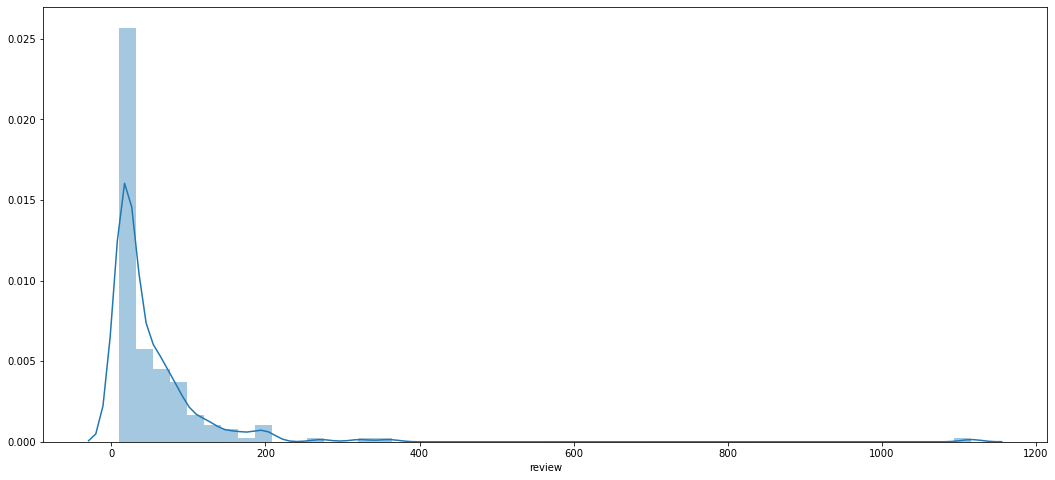

In [125]:
plt.figure(figsize=(18,8))
sns.distplot(페이토강남['review'].str.len())

In [126]:
페이토강남_200 = 페이토강남[페이토강남['review'].str.len() < 200]

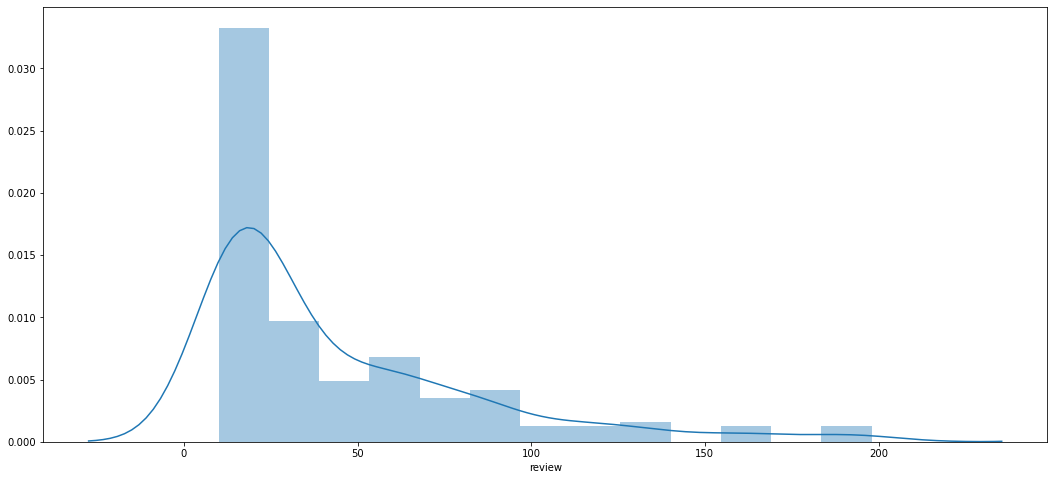

In [127]:
plt.figure(figsize=(18,8))
sns.distplot(페이토강남_200['review'].str.len())

In [17]:
페이토강남['name'] = 'peito'
임피리얼팰리스['name'] = 'impirial'
신라스테이_역삼['name'] = 'sinra'

In [20]:
pd.concat([페이토강남,임피리얼팰리스,신라스테이_역삼])

,review,star,name
0,시설 엄청좋아요 ~,10.0,peito
1,호텔 페이토 강남 조식 할인 낚시 가을 패키지 후기. 카페 포즈 추가요금 요구 대응...,5.6,peito
2,잘쉬고 갑니다!담에 또올께요,9.3,peito
3,직원분들 친절하시고 룸은 깨끗하고 좋아요!,10.0,peito
4,사진이랑 많이 달랐어요 방 전체적인 인테리어가 좀 촌스럽고 올드한 느낌이라서 실망했...,4.6,peito
...,...,...,...
487,깨끗하고 직원이 친절,8.8,sinra
488,침대옆 책상 아래부분이 조금 더 깨끗이 청소되면 좋겠습니다. 이외에 다른 부분은 룸...,8.4,sinra
489,객실및 화장실선반에 먼지많음 수건이청결하지않은거같음,6.1,sinra
490,전반적으로 나쁘지 않았습니다,8.8,sinra


## 테스트

In [49]:
driver = webdriver.Chrome('./chromedriver')
url = 'https://www.goodchoice.kr/product/detail?ano=65311'
driver.implicitly_wait(3)

driver.get(url)

# 페이지 파싱
html = driver.page_source
soup = bs(html, 'html.parser')

# '리뷰' 클릭하도록 명령
driver.find_element_by_xpath('//*[@id="content"]/div[2]/button[3]').click()

html = driver.page_source
soup = bs(html, 'html.parser')
        
reviews = soup.select('#review > ul > li')

r1 = []
s1 = []

for r in reviews:
    r1.append(r.select_one('.txt').text)
    s1.append(r.select_one('.score_wrap_sm .num').text)

In [50]:
r1

['기념일에 이용하기 떡이에요요리하고 쉬고 놀고 아주좋았어요',
 '깔끔하고좋아요~~~',
 '조아여ㅎㅎ자주 이용 할게용',
 '객실이 너무 깨끗하고 냄새도 너무 좋았습니다 그리고 직원분들께서 친절하시고 다음에 또 오고 싶은 호텔이었습니다 그리고 코엑스와 붙어있어서 놀거리 볼거리 많아서 좋았습니다',
 '레지던스라 파티할때 좋을 것 같아요넓고 깨끗해요침구도 좋네용다만 좀 연식이 느껴지구요변기 수압이 너무 약해요조용한방 부탁드렸는데 엘베 앞이라닝....그리고 사우나는 기냥 그랬어요',
 '친철한 응대와 룸배정으로 편하게 보냈습니다',
 '너무 좋았습니다.잘 묵고 갑니다',
 '객실청결, 직원친절합니다 첫방문인데 다른 레지던스에 비해 매우 만족합니다',
 '4명함께 이용하는데친구들모두 너무넓고쾌적해서 좋아했어요♡',
 '사진으로 보는거보다 좋았던거 같아요. 방도 진짜 크고 거실도 크고 엄마는 주방큰거를 엄청 맘에 들어하셨어요. 주변에 이용시설도 좋아서 다음에도 또 가고싶은 호텔입니다.']